This workbook shows the breakdown of energy use by sector

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as date
import matplotlib.ticker as mtick
import matplotlib.gridspec as gridspec
import textwrap

In [2]:
CanESM_csv_names = ['CanESM.csv', 'CanESM_ag.csv', 'CanESM_ww.csv', 'CanESM_out.csv', 'CanESM_in.csv', 'CanESM_mar.csv']
CESM1BGC_csv_names = ['CESM1BGC.csv', 'CESM1BGC_ag.csv', 'CESM1BGC_ww.csv', 'CESM1BGC_out.csv', 'CESM1BGC_in.csv', 'CESM1BGC_mar.csv']  
CMCCCM_csv_names = ['CMCCCM.csv', 'CMCCCM_ag.csv', 'CMCCCM_ww.csv', 'CMCCCM_out.csv', 'CMCCCM_in.csv', 'CMCCCM_mar.csv']  

In [3]:
#create dfs from the .csvs
#THIS WILL NEED TO BE TESTED... need dfs to retain their names
def create_dfs_from_csvs (dfs_name_list):
    for name in dfs_name_list:
        df_name = name.replace('.csv', '')
        if not df_name.startswith('df'):
            df_name = 'df'+ df_name
        globals()[df_name] = pd.read_csv(name)


In [4]:
create_dfs_from_csvs(CanESM_csv_names)
create_dfs_from_csvs(CESM1BGC_csv_names)
create_dfs_from_csvs(CMCCCM_csv_names)
create_dfs_from_csvs(['RefLOCA.csv'])

In [5]:
CanESM_dfs = [dfCanESM, dfCanESM_ag, dfCanESM_ww, dfCanESM_out, dfCanESM_in, dfCanESM_mar]
CESM1BGC_dfs = [dfCESM1BGC, dfCESM1BGC_ag, dfCESM1BGC_ww, dfCESM1BGC_out, dfCESM1BGC_in, dfCESM1BGC_mar]
CMCCCM_dfs = [dfCMCCCM, dfCMCCCM_ag, dfCMCCCM_ww, dfCMCCCM_out, dfCMCCCM_in, dfCMCCCM_mar]
CanESM_labels = ['CanESM', 'CanESM_ag', 'CanESM_ww', 'CanESM_out', 'CanESM_in', 'CanESM_mar']
CESM1BGC_labels = ['CESM1BGC', 'CESM1BGC_ag', 'CESM1BGC_ww', 'CESM1BGC_out', 'CESM1BGC_in', 'CESM1BGC_mar']  
CMCCCM_labels = ['CMCCCM', 'CMCCCM_ag', 'CMCCCM_ww', 'CMCCCM_out', 'CMCCCM_in', 'CMCCCM_mar'] 

In [6]:
def fix_columns (df_list):
    for df in df_list:
        #drop the Unnamed: 0 column
        df.drop(["Unnamed: 0"], axis = 1, inplace=True)
        #change the date column to datetime type
        df['Date'] = pd.to_datetime(df['Date'])

In [7]:
fix_columns(CanESM_dfs)
fix_columns(CESM1BGC_dfs)
fix_columns(CMCCCM_dfs)
fix_columns([dfRefLOCA])

In [8]:

# test_df = dfCanESM.drop('Date', axis=1)
# test_df = test_df.groupby('Year').sum().reset_index()
# test_df['Scenario'] = 'CanESM'
# test_df.reset_index(drop=True)
# test_df

In [9]:
electric_columns = dfCanESM.filter(regex='Elec_').columns.tolist()

In [10]:
mapping_df = pd.read_csv('Energy Type Mapping.csv')
mapping_list = mapping_df.values.tolist()

In [11]:
category_mapping_list = []
missing_list = []
# counter = 0
# counter2 = 0
# counter3 = 0

for item in electric_columns:
    for map in mapping_list:
        if item[5:-5] == map[0]:
            category_mapping_list.append(map)
            # counter+=1
            break
    else:
        if 'Return Flow' in item:
            category_mapping_list.append([item[5:-5], 'WW Recycling'])
            # counter2 +=1
        else:
            missing_list.append(item)
            # counter3+=1
            

# print(counter, counter2, counter3)
# missing_list

In [12]:
# test_df = test_df[test_df['Year'] >=2020]
# test_df

In [13]:
dfCanESM2020 = dfCanESM[(dfCanESM['Year'] > 2020)]
dfCanESM2020_in = dfCanESM_in[(dfCanESM_in['Year'] > 2020)]
dfCanESM2020_out = dfCanESM_out[(dfCanESM_out['Year'] > 2020)]
dfCanESM2020_ag = dfCanESM_ag[(dfCanESM_ag['Year'] > 2020)]
dfCanESM2020_ww = dfCanESM_ww[(dfCanESM_ww['Year'] > 2020)]
dfCanESM2020_mar = dfCanESM_mar[(dfCanESM_mar['Year'] > 2020)]

dfCESM1BGC2020 = dfCESM1BGC[(dfCESM1BGC['Year'] > 2020)]
dfCESM1BGC2020_in = dfCESM1BGC_in[(dfCESM1BGC_in['Year'] > 2020)]
dfCESM1BGC2020_out = dfCESM1BGC_out[(dfCESM1BGC_out['Year'] > 2020)]
dfCESM1BGC2020_ag = dfCESM1BGC_ag[(dfCESM1BGC_ag['Year'] > 2020)]
dfCESM1BGC2020_ww = dfCESM1BGC_ww[(dfCESM1BGC_ww['Year'] > 2020)]
dfCESM1BGC2020_mar = dfCESM1BGC_mar[(dfCESM1BGC_mar['Year'] > 2020)]

dfCMCCCM2020 = dfCMCCCM[(dfCMCCCM['Year'] > 2020)]
dfCMCCCM2020_in = dfCMCCCM_in[(dfCMCCCM_in['Year'] > 2020)]
dfCMCCCM2020_out = dfCMCCCM_out[(dfCMCCCM_out['Year'] > 2020)]
dfCMCCCM2020_ag = dfCMCCCM_ag[(dfCMCCCM_ag['Year'] > 2020)]
dfCMCCCM2020_ww = dfCMCCCM_ww[(dfCMCCCM_ww['Year'] > 2020)]
dfCMCCCM2020_mar = dfCMCCCM_mar[(dfCMCCCM_mar['Year'] > 2020)]

dfRefLOCA2020 = dfRefLOCA[(dfRefLOCA['Year'] > 2020)]

In [14]:
def sum_by_category (df, possible_match_list, match_value):
    confirmed_match_list = []
    for lst in possible_match_list:
        if lst[1] == match_value:
            confirmed_match_list.append('Elec_' + lst[0] + '[GwH]')

    filtered_df = df[confirmed_match_list]
    row_sums = filtered_df.sum(axis=1)
    df['Total_energy_' + match_value] = row_sums
    return df 

In [15]:
match_value_list = ['AgUse', 'Groundwater pumping + AgUse', 'None given', 'Nonpotable reuse + DistEnergy', 'MuniTreat + DistEnergy',
                    'Groundwater pumping', 'WaterHeating', 'Conveyance pumping', 'WWTreatment', 'WW Recycling']

In [16]:
pd.options.mode.chained_assignment = None

In [21]:
for value in match_value_list:
    dfCanESM2020 = sum_by_category(dfCanESM2020, category_mapping_list, value)
    dfCanESM2020_ww = sum_by_category(dfCanESM2020_ww, category_mapping_list, value)
    dfCESM1BGC2020 = sum_by_category(dfCESM1BGC2020, category_mapping_list, value)
    dfCESM1BGC2020_ww = sum_by_category(dfCESM1BGC2020_ww, category_mapping_list, value)
    dfCMCCCM2020 = sum_by_category(dfCMCCCM2020, category_mapping_list, value)
    dfCMCCCM2020_ww = sum_by_category(dfCMCCCM2020_ww, category_mapping_list, value)

In [22]:
dfCanESM2020 = dfCanESM2020.drop('Date', axis=1)
dfCanESM2020_ww = dfCanESM2020_ww.drop('Date', axis=1)
dfCESM1BGC2020 = dfCESM1BGC2020.drop('Date', axis=1)
dfCESM1BGC2020_ww = dfCESM1BGC2020_ww.drop('Date', axis=1)
dfCMCCCM2020 = dfCMCCCM2020.drop('Date', axis=1)
dfCMCCCM2020_ww = dfCMCCCM2020_ww.drop('Date', axis=1)


dfCanESM2020_by_year = dfCanESM2020.groupby('Year').sum().reset_index()
dfCanESM2020_ww_by_year = dfCanESM2020_ww.groupby('Year').sum().reset_index()
dfCESM1BGC2020_by_year = dfCESM1BGC2020.groupby('Year').sum().reset_index()
dfCESM1BGC2020_ww_by_year = dfCESM1BGC2020_ww.groupby('Year').sum().reset_index()
dfCMCCCM2020_by_year = dfCMCCCM2020.groupby('Year').sum().reset_index()
dfCMCCCM2020_ww_by_year = dfCMCCCM2020_ww.groupby('Year').sum().reset_index()
           

In [23]:
year_dfs = [dfCanESM2020_by_year, dfCanESM2020_ww_by_year, dfCESM1BGC2020_by_year, dfCESM1BGC2020_ww_by_year, dfCMCCCM2020_by_year, dfCMCCCM2020_ww_by_year]

In [24]:


# Assuming your DataFrame is named 'df'
for df in year_dfs: 
    df['Total_energy_Total'] = df[['Total_energy_AgUse', 'Total_energy_Groundwater pumping + AgUse', 'Total_energy_None given', 
                                   'Total_energy_Nonpotable reuse + DistEnergy', 'Total_energy_MuniTreat + DistEnergy', 
                                   'Total_energy_Groundwater pumping', 'Total_energy_WaterHeating', 'Total_energy_Conveyance pumping', 
                                   'Total_energy_WWTreatment', 'Total_energy_WW Recycling']].sum(axis=1)

#Merges --> Wastewater: WW Treatment, WW Recycling, and Nonpotable resue and distribution
#Merges --> Domestic: Municipal treatment & distribution, Water heating
#Merges --> Groundwater & Ag: Groundwater pumping, Agriculture, Groundwater pumping & Agriculture
#Merges --> Conveyance: Conveyance
#Merges --> Other: Other
    df['Wastewater'] = df[['Total_energy_WWTreatment', 'Total_energy_WW Recycling', 'Total_energy_Nonpotable reuse + DistEnergy']].sum(axis=1)
    df['Domestic water'] = df[['Total_energy_MuniTreat + DistEnergy', 'Total_energy_WaterHeating']].sum(axis=1)
    df['Groundwater pumping and agriculture'] = df[['Total_energy_AgUse', 'Total_energy_Groundwater pumping + AgUse','Total_energy_Groundwater pumping']].sum(axis=1)
    df['Conveyance'] = df[['Total_energy_Conveyance pumping']].sum(axis=1)
    df['Other'] = df[['Total_energy_None given']].sum(axis=1)


In [25]:
# dfCanESM2020_by_year[['Total_energy_AgUse', 'Total_energy_Groundwater pumping + AgUse', 'Total_energy_None given', 'Total_energy_Nonpotable reuse + DistEnergy',
#                       'Total_energy_MuniTreat + DistEnergy', 'Total_energy_Groundwater pumping', 'Total_energy_WaterHeating', 'Total_energy_Conveyance pumping',
#                       'Total_energy_WWTreatment', 'Total_energy_WW Recycling']].plot(kind='area', stacked=True, figsize=(15,6))  

# def graph_energy_use_area (df, columns_to_plot, name):

#     df_selected = df[columns_to_plot]
    
#     columns_to_divide = df_selected.columns.difference(['Year'])
    
#     # Divide the selected columns by 1000
#     df_selected[columns_to_divide] = df_selected[columns_to_divide] / 1000
    
#     df_selected.plot(kind='area', stacked=True, x='Year', figsize=(15, 6))

#     plt.legend()
#     plt.title(name)
#     plt.ylim(0, 160)
#     plt.xlabel('Year')
#     plt.ylabel('Gigawatt Hours')
#     plt.show()

In [26]:
total_energy_columns = ['Wastewater', 'Domestic water', 'Groundwater pumping and agriculture', 'Conveyance', 'Other', 'Year']

year_df_names = ['CanESM Energy Use By Type', 'CanESM Energy Use By Type with wastewater recycling', 
                 'CESM1BGC Energy Use By Type', 'CESM1BGC Energy Use By Type with wastewater recycling',
                 'CMCCCM Energy Use By Type', 'CMCCCM Energy Use By Type with wastewater recycling']

In [22]:
def graph_energy_use (df_list, columns_to_plot, name_list):

    fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 25))
    
    for i, (df, name) in enumerate(zip(df_list, name_list)):
        df_selected = df[columns_to_plot]
        
        columns_to_divide = df_selected.columns.difference(['Year'])
        
        # Divide the selected columns by 1000
        df_selected[columns_to_divide] = df_selected[columns_to_divide] / 1000

        #this helps position the 6 plots in the relevant places to each other
        if i <=1:
            j = 0
        elif i<=3:
            j = 1
        else:
            j=2

        if i % 2 !=0:
            k = 1
        else:
            k = 0
        
        df_selected['Domestic water'].plot(kind='line', x='Year', figsize=(15, 6), ax=axs[j, k], linestyle=':', legend=False)
        df_selected['Wastewater'].plot(kind='line', x='Year', figsize=(15, 6), ax=axs[j, k], legend=False, linewidth=2)
        df_selected['Groundwater pumping and agriculture'].plot(kind='line', x='Year', figsize=(15, 6), linestyle=':', ax=axs[j, k], legend=False)
        df_selected['Conveyance'].plot(kind='line', x='Year', figsize=(15, 6), linestyle=':', ax=axs[j, k], legend=False)
        df_selected['Other'].plot(kind='line', x='Year', figsize=(15, 6), linestyle=':', ax=axs[j, k], legend=False)
    
        
        # axs[j, k].legend(fontsize=8)
        axs[j, k].set_title(name)
        axs[j, k].set_ylim(0, 70)
        axs[j, k].set_xlabel('Year')
        axs[j, k].set_ylabel('Gigawatt Hours')
    plt.legend(title = 'Energy use from source', loc='lower center', bbox_to_anchor=(0,-1.5), ncol=2, fancybox=True)
    plt.subplots_adjust(hspace=1)
    plt.show()

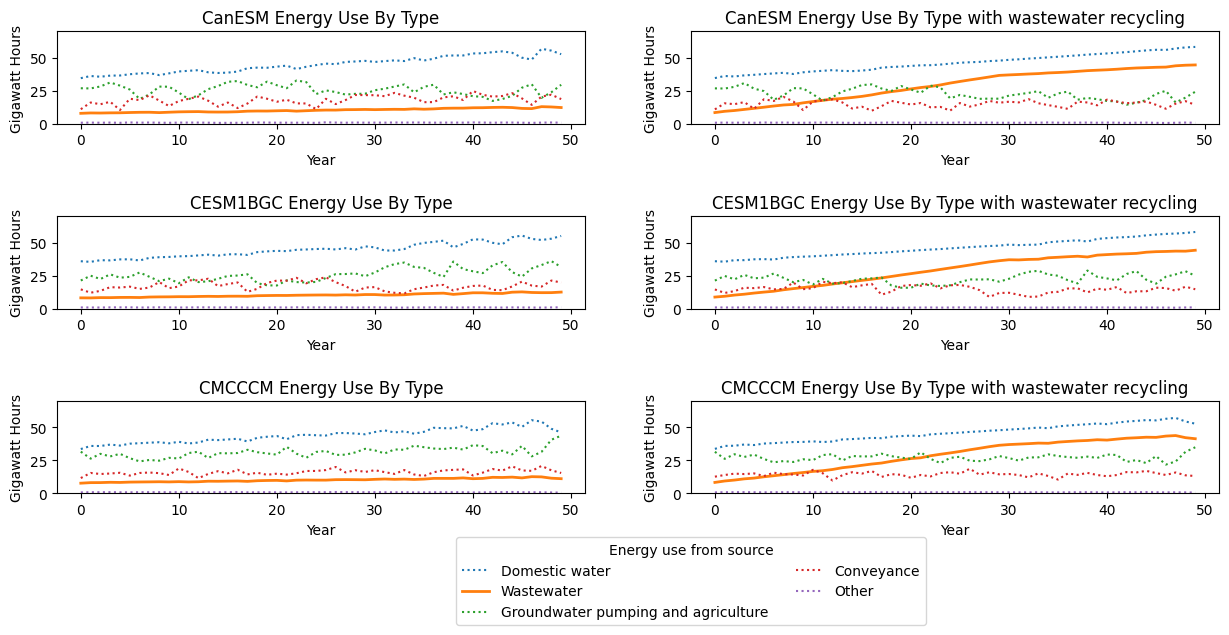

In [23]:
graph_energy_use(year_dfs, total_energy_columns, year_df_names)

In [27]:
dfCanESM2011_2020 = dfCanESM[(dfCanESM['Year'] >= 2011) & (dfCanESM['Year'] <= 2020)]
dfCESM1BGC2011_2020 = dfCESM1BGC[(dfCESM1BGC['Year'] >= 2011) & (dfCESM1BGC['Year'] <= 2020)]
dfCMCCCM2011_2020 = dfCMCCCM[(dfCMCCCM['Year'] >= 2011) & (dfCMCCCM['Year'] <= 2020)]
dfRefLOCA2011_2020 = dfRefLOCA[(dfRefLOCA['Year'] >= 2011) & (dfRefLOCA['Year'] <= 2020)]

dfCanESM2061_2070 = dfCanESM[(dfCanESM['Year'] >= 2061) & (dfCanESM['Year'] <= 2070)]
dfCESM1BGC2061_2070 = dfCESM1BGC[(dfCESM1BGC['Year'] >= 2061) & (dfCESM1BGC['Year'] <= 2070)]
dfCMCCCM2061_2070 = dfCMCCCM[(dfCMCCCM['Year'] >= 2061) & (dfCMCCCM['Year'] <= 2070)]
dfRefLOCA2061_2070 = dfRefLOCA[(dfRefLOCA['Year'] >= 2061) & (dfRefLOCA['Year'] <= 2070)]

dfCanESM_ww2061_2070 = dfCanESM_ww[(dfCanESM_ww['Year'] >= 2061) & (dfCanESM_ww['Year'] <= 2070)]
dfCESM1BGC_ww2061_2070 = dfCESM1BGC_ww[(dfCESM1BGC_ww['Year'] >= 2061) & (dfCESM1BGC_ww['Year'] <= 2070)]
dfCMCCCM_ww2061_2070 = dfCMCCCM_ww[(dfCMCCCM_ww['Year'] >= 2061) & (dfCMCCCM_ww['Year'] <= 2070)]

In [28]:
for value in match_value_list:
    dfCanESM2011_2020 = sum_by_category(dfCanESM2011_2020, category_mapping_list, value)
    dfCESM1BGC2011_2020 = sum_by_category(dfCESM1BGC2011_2020, category_mapping_list, value)
    dfCMCCCM2011_2020 = sum_by_category(dfCMCCCM2011_2020, category_mapping_list, value)
    dfRefLOCA2011_2020 = sum_by_category(dfRefLOCA2011_2020, category_mapping_list, value)
    dfCanESM2061_2070 = sum_by_category(dfCanESM2061_2070, category_mapping_list, value)
    dfCESM1BGC2061_2070 = sum_by_category(dfCESM1BGC2061_2070, category_mapping_list, value)
    dfCMCCCM2061_2070 = sum_by_category(dfCMCCCM2061_2070, category_mapping_list, value)
    dfRefLOCA2061_2070 = sum_by_category(dfRefLOCA2061_2070, category_mapping_list, value)
    dfCanESM_ww2061_2070 = sum_by_category(dfCanESM_ww2061_2070, category_mapping_list, value)
    dfCESM1BGC_ww2061_2070 = sum_by_category(dfCESM1BGC_ww2061_2070, category_mapping_list, value)
    dfCMCCCM_ww2061_2070 = sum_by_category(dfCMCCCM_ww2061_2070, category_mapping_list, value)

In [29]:
dfCanESM2011_2020 = dfCanESM2011_2020.drop('Date', axis=1) 
dfCESM1BGC2011_2020 = dfCESM1BGC2011_2020.drop('Date', axis=1)
dfCMCCCM2011_2020 = dfCMCCCM2011_2020.drop('Date', axis=1)
dfRefLOCA2011_2020 = dfRefLOCA2011_2020.drop('Date', axis=1)
dfCanESM2061_2070 = dfCanESM2061_2070.drop('Date', axis=1)
dfCESM1BGC2061_2070 = dfCESM1BGC2061_2070.drop('Date', axis=1)
dfCMCCCM2061_2070 = dfCMCCCM2061_2070.drop('Date', axis=1)
dfRefLOCA2061_2070 = dfRefLOCA2061_2070.drop('Date', axis=1)
dfCanESM_ww2061_2070 = dfCanESM_ww2061_2070.drop('Date', axis=1)
dfCESM1BGC_ww2061_2070 = dfCESM1BGC_ww2061_2070.drop('Date', axis=1)
dfCMCCCM_ww2061_2070 = dfCMCCCM_ww2061_2070.drop('Date', axis=1)

In [30]:
energy_dfs = [dfCanESM2011_2020, dfCESM1BGC2011_2020, dfCMCCCM2011_2020, dfRefLOCA2011_2020, dfCanESM2061_2070, dfCESM1BGC2061_2070, dfCMCCCM2061_2070, dfRefLOCA2061_2070, dfCanESM_ww2061_2070, dfCESM1BGC_ww2061_2070, dfCMCCCM_ww2061_2070]

In [31]:
for df in energy_dfs: 
    df['Total_energy_Total'] = df[['Total_energy_AgUse', 'Total_energy_Groundwater pumping + AgUse', 'Total_energy_None given', 
                                   'Total_energy_Nonpotable reuse + DistEnergy', 'Total_energy_MuniTreat + DistEnergy', 
                                   'Total_energy_Groundwater pumping', 'Total_energy_WaterHeating', 'Total_energy_Conveyance pumping', 
                                   'Total_energy_WWTreatment', 'Total_energy_WW Recycling']].sum(axis=1)

#Merges --> Wastewater: WW Treatment, WW Recycling, and Nonpotable resue and distribution
#Merges --> Domestic: Municipal treatment & distribution, Water heating
#Merges --> Groundwater & Ag: Groundwater pumping, Agriculture, Groundwater pumping & Agriculture
#Merges --> Conveyance: Conveyance
#Merges --> Other: Other
    df['Wastewater treatment'] = df[['Total_energy_WWTreatment', 'Total_energy_WW Recycling', 'Total_energy_Nonpotable reuse + DistEnergy']].sum(axis=1)
    df['Domestic water'] = df[['Total_energy_MuniTreat + DistEnergy', 'Total_energy_WaterHeating']].sum(axis=1)
    df['Groundwater pumping and agriculture'] = df[['Total_energy_AgUse', 'Total_energy_Groundwater pumping + AgUse','Total_energy_Groundwater pumping']].sum(axis=1)
    df['Conveyance'] = df[['Total_energy_Conveyance pumping']].sum(axis=1)
    df['Other'] = df[['Total_energy_None given']].sum(axis=1)
    df = df.groupby('Year').sum()

In [32]:
dfCanESM2011_2020 = dfCanESM2011_2020.groupby('Year').sum()
dfCESM1BGC2011_2020 = dfCESM1BGC2011_2020.groupby('Year').sum()
dfCMCCCM2011_2020 = dfCMCCCM2011_2020.groupby('Year').sum()
dfRefLOCA2011_2020 = dfRefLOCA2011_2020.groupby('Year').sum()
dfCanESM2061_2070 = dfCanESM2061_2070.groupby('Year').sum()
dfCESM1BGC2061_2070 = dfCESM1BGC2061_2070.groupby('Year').sum()
dfCMCCCM2061_2070 = dfCMCCCM2061_2070.groupby('Year').sum()
dfRefLOCA2061_2070 = dfRefLOCA2061_2070.groupby('Year').sum()
dfCanESM_ww2061_2070 = dfCanESM_ww2061_2070.groupby('Year').sum()
dfCESM1BGC_ww2061_2070 = dfCESM1BGC_ww2061_2070.groupby('Year').sum()
dfCMCCCM_ww2061_2070 = dfCMCCCM_ww2061_2070.groupby('Year').sum()

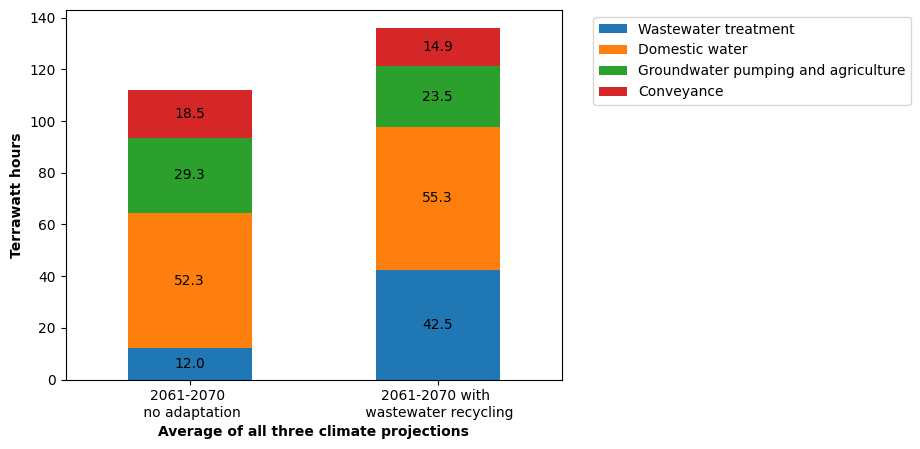

In [33]:
# average_values00 = dfCanESM2011_2020[['Wastewater treatment', 'Domestic water', 'Groundwater pumping and agriculture', 'Conveyance']].mean()
average_values01 = dfCanESM2061_2070[['Wastewater treatment', 'Domestic water', 'Groundwater pumping and agriculture', 'Conveyance']].mean()
average_values02 = dfCanESM_ww2061_2070[['Wastewater treatment', 'Domestic water', 'Groundwater pumping and agriculture', 'Conveyance']].mean()

# average_values10 = dfCESM1BGC2011_2020[['Wastewater treatment', 'Domestic water', 'Groundwater pumping and agriculture', 'Conveyance']].mean()
average_values11 = dfCESM1BGC2061_2070[['Wastewater treatment', 'Domestic water', 'Groundwater pumping and agriculture', 'Conveyance']].mean()
average_values12 = dfCESM1BGC_ww2061_2070[['Wastewater treatment', 'Domestic water', 'Groundwater pumping and agriculture', 'Conveyance']].mean()

# average_values20 = dfCMCCCM2011_2020[['Wastewater treatment', 'Domestic water', 'Groundwater pumping and agriculture', 'Conveyance']].mean()
average_values21 = dfCMCCCM2061_2070[['Wastewater treatment', 'Domestic water', 'Groundwater pumping and agriculture', 'Conveyance']].mean()
average_values22 = dfCMCCCM_ww2061_2070[['Wastewater treatment', 'Domestic water', 'Groundwater pumping and agriculture', 'Conveyance']].mean()


# df_avg_values0 = pd.DataFrame([average_values00, average_values10, average_values20])
# df_avg_values0
# average_values0 = df_avg_values0.mean(axis=0)
# average_values0

df_avg_values1 = pd.DataFrame([average_values01, average_values11, average_values21])
average_values1 = df_avg_values1.mean(axis=0)

df_avg_values2 = pd.DataFrame([average_values02, average_values12, average_values22])
average_values2 = df_avg_values2.mean(axis=0)

#turns the average values into a dataframe and transposes them so they can be graphed properly
# average_values0 = average_values0.to_frame()
average_values1 = average_values1.to_frame()
average_values2 = average_values2.to_frame()
# average_values0 = average_values0.transpose()
average_values1 = average_values1.transpose()
average_values2 = average_values2.transpose()

average_values = pd.concat([#average_values0,
                            average_values1, average_values2]) /1000

average_values['scenario'] = [#'2011-2020 \n no adaptation', 
                              '2061-2070 \n no adaptation', '2061-2070 with \n wastewater recycling']
average_values.set_index('scenario', inplace=True)

# Create a stacked bar chart
ax = average_values.plot(kind='bar', stacked=True)

# Add data labels
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}', (x + width/2, y + height/2), ha='center', va='center')

# Customize the plot (optional)
plt.xlabel('Average of all three climate projections', fontweight='bold')
plt.ylabel('Terrawatt hours', fontweight='bold')
# plt.title('Average annual energy use by sector in hot and wet scenario', fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()

In [42]:
dfCanESM_in2061_2070 = dfCanESM_in[(dfCanESM_in['Year'] >= 2061) & (dfCanESM_in['Year'] <= 2070)]
dfCESM1BGC_in2061_2070 = dfCESM1BGC_in[(dfCESM1BGC_in['Year'] >= 2061) & (dfCESM1BGC_in['Year'] <= 2070)]
dfCMCCCM_in2061_2070 = dfCMCCCM_in[(dfCMCCCM_in['Year'] >= 2061) & (dfCMCCCM_in['Year'] <= 2070)]

In [43]:
for value in match_value_list:
    dfCanESM2011_2020 = sum_by_category(dfCanESM2011_2020, category_mapping_list, value)
    dfCESM1BGC2011_2020 = sum_by_category(dfCESM1BGC2011_2020, category_mapping_list, value)
    dfCMCCCM2011_2020 = sum_by_category(dfCMCCCM2011_2020, category_mapping_list, value)
    dfRefLOCA2011_2020 = sum_by_category(dfRefLOCA2011_2020, category_mapping_list, value)
    dfCanESM2061_2070 = sum_by_category(dfCanESM2061_2070, category_mapping_list, value)
    dfCESM1BGC2061_2070 = sum_by_category(dfCESM1BGC2061_2070, category_mapping_list, value)
    dfCMCCCM2061_2070 = sum_by_category(dfCMCCCM2061_2070, category_mapping_list, value)
    dfRefLOCA2061_2070 = sum_by_category(dfRefLOCA2061_2070, category_mapping_list, value)
    dfCanESM_in2061_2070 = sum_by_category(dfCanESM_in2061_2070, category_mapping_list, value)
    dfCESM1BGC_in2061_2070 = sum_by_category(dfCESM1BGC_in2061_2070, category_mapping_list, value)
    dfCMCCCM_in2061_2070 = sum_by_category(dfCMCCCM_in2061_2070, category_mapping_list, value)

In [44]:
# dfCanESM2011_2020 = dfCanESM2011_2020.drop('Date', axis=1) 
# dfCESM1BGC2011_2020 = dfCESM1BGC2011_2020.drop('Date', axis=1)
# dfCMCCCM2011_2020 = dfCMCCCM2011_2020.drop('Date', axis=1)
# dfRefLOCA2011_2020 = dfRefLOCA2011_2020.drop('Date', axis=1)
# dfCanESM2061_2070 = dfCanESM2061_2070.drop('Date', axis=1)
# dfCESM1BGC2061_2070 = dfCESM1BGC2061_2070.drop('Date', axis=1)
# dfCMCCCM2061_2070 = dfCMCCCM2061_2070.drop('Date', axis=1)
# dfRefLOCA2061_2070 = dfRefLOCA2061_2070.drop('Date', axis=1)
dfCanESM_in2061_2070 = dfCanESM_in2061_2070.drop('Date', axis=1)
dfCESM1BGC_in2061_2070 = dfCESM1BGC_in2061_2070.drop('Date', axis=1)
dfCMCCCM_in2061_2070 = dfCMCCCM_in2061_2070.drop('Date', axis=1)

In [45]:
energy_dfs = [dfCanESM2011_2020, dfCESM1BGC2011_2020, dfCMCCCM2011_2020, dfRefLOCA2011_2020, dfCanESM2061_2070, dfCESM1BGC2061_2070, dfCMCCCM2061_2070, dfRefLOCA2061_2070, dfCanESM_in2061_2070, dfCESM1BGC_in2061_2070, dfCMCCCM_in2061_2070]

In [46]:
for df in energy_dfs: 
    df['Total_energy_Total'] = df[['Total_energy_AgUse', 'Total_energy_Groundwater pumping + AgUse', 'Total_energy_None given', 
                                   'Total_energy_Nonpotable reuse + DistEnergy', 'Total_energy_MuniTreat + DistEnergy', 
                                   'Total_energy_Groundwater pumping', 'Total_energy_WaterHeating', 'Total_energy_Conveyance pumping', 
                                   'Total_energy_WWTreatment', 'Total_energy_WW Recycling']].sum(axis=1)

#Merges --> Wastewater: WW Treatment, WW Recycling, and Nonpotable resue and distribution
#Merges --> Domestic: Municipal treatment & distribution, Water heating
#Merges --> Groundwater & Ag: Groundwater pumping, Agriculture, Groundwater pumping & Agriculture
#Merges --> Conveyance: Conveyance
#Merges --> Other: Other
    df['Wastewater treatment'] = df[['Total_energy_WWTreatment', 'Total_energy_WW Recycling', 'Total_energy_Nonpotable reuse + DistEnergy']].sum(axis=1)
    #df['Domestic water'] = df[['Total_energy_MuniTreat + DistEnergy', 'Total_energy_WaterHeating']].sum(axis=1)
    df['Domestic water treatment and distribution'] = df[['Total_energy_MuniTreat + DistEnergy']].sum(axis=1)
    df['Domestic water heating'] = df[['Total_energy_WaterHeating']].sum(axis=1)
    df['Groundwater pumping and agriculture'] = df[['Total_energy_AgUse', 'Total_energy_Groundwater pumping + AgUse','Total_energy_Groundwater pumping']].sum(axis=1)
    df['Conveyance'] = df[['Total_energy_Conveyance pumping']].sum(axis=1)
    df['Other'] = df[['Total_energy_None given']].sum(axis=1)
    df = df.groupby('Year').sum()

In [47]:
dfCanESM2011_2020 = dfCanESM2011_2020.groupby('Year').sum()
dfCESM1BGC2011_2020 = dfCESM1BGC2011_2020.groupby('Year').sum()
dfCMCCCM2011_2020 = dfCMCCCM2011_2020.groupby('Year').sum()
dfRefLOCA2011_2020 = dfRefLOCA2011_2020.groupby('Year').sum()
dfCanESM2061_2070 = dfCanESM2061_2070.groupby('Year').sum()
dfCESM1BGC2061_2070 = dfCESM1BGC2061_2070.groupby('Year').sum()
dfCMCCCM2061_2070 = dfCMCCCM2061_2070.groupby('Year').sum()
dfRefLOCA2061_2070 = dfRefLOCA2061_2070.groupby('Year').sum()
dfCanESM_in2061_2070 = dfCanESM_in2061_2070.groupby('Year').sum()
dfCESM1BGC_in2061_2070 = dfCESM1BGC_in2061_2070.groupby('Year').sum()
dfCMCCCM_in2061_2070 = dfCMCCCM_in2061_2070.groupby('Year').sum()

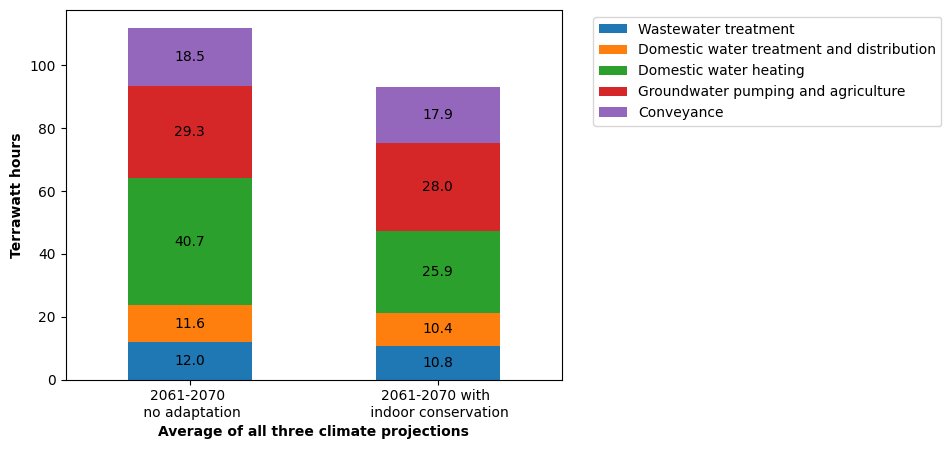

In [51]:
# average_values00 = dfCanESM2011_2020[['Wastewater treatment', 'Domestic water', 'Groundwater pumping and agriculture', 'Conveyance']].mean()
average_values01 = dfCanESM2061_2070[['Wastewater treatment', 'Domestic water treatment and distribution', 'Domestic water heating', 'Groundwater pumping and agriculture', 'Conveyance']].mean()
average_values02 = dfCanESM_in2061_2070[['Wastewater treatment', 'Domestic water treatment and distribution', 'Domestic water heating', 'Groundwater pumping and agriculture', 'Conveyance']].mean()

# average_values10 = dfCESM1BGC2011_2020[['Wastewater treatment', 'Domestic water', 'Groundwater pumping and agriculture', 'Conveyance']].mean()
average_values11 = dfCESM1BGC2061_2070[['Wastewater treatment', 'Domestic water treatment and distribution', 'Domestic water heating', 'Groundwater pumping and agriculture', 'Conveyance']].mean()
average_values12 = dfCESM1BGC_in2061_2070[['Wastewater treatment', 'Domestic water treatment and distribution', 'Domestic water heating', 'Groundwater pumping and agriculture', 'Conveyance']].mean()

# average_values20 = dfCMCCCM2011_2020[['Wastewater treatment', 'Domestic water', 'Groundwater pumping and agriculture', 'Conveyance']].mean()
average_values21 = dfCMCCCM2061_2070[['Wastewater treatment', 'Domestic water treatment and distribution', 'Domestic water heating', 'Groundwater pumping and agriculture', 'Conveyance']].mean()
average_values22 = dfCMCCCM_in2061_2070[['Wastewater treatment', 'Domestic water treatment and distribution', 'Domestic water heating', 'Groundwater pumping and agriculture', 'Conveyance']].mean()


# df_avg_values0 = pd.DataFrame([average_values00, average_values10, average_values20])
# df_avg_values0
average_values0 = df_avg_values0.mean(axis=0)
average_values0

df_avg_values1 = pd.DataFrame([average_values01, average_values11, average_values21])
average_values1 = df_avg_values1.mean(axis=0)

df_avg_values2 = pd.DataFrame([average_values02, average_values12, average_values22])
average_values2 = df_avg_values2.mean(axis=0)

#turns the average values into a dataframe and transposes them so they can be graphed properly
# average_values0 = average_values0.to_frame()
average_values1 = average_values1.to_frame()
average_values2 = average_values2.to_frame()
# average_values0 = average_values0.transpose()
average_values1 = average_values1.transpose()
average_values2 = average_values2.transpose()

average_values = pd.concat([#average_values0,
                            average_values1, average_values2]) /1000

average_values['scenario'] = [#'2011-2020 \n no adaptation', 
                              '2061-2070 \n no adaptation', '2061-2070 with \n indoor conservation']
average_values.set_index('scenario', inplace=True)

# Create a stacked bar chart
ax = average_values.plot(kind='bar', stacked=True)

# Add data labels
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}', (x + width/2, y + height/2), ha='center', va='center')

# Customize the plot (optional)
plt.xlabel('Average of all three climate projections', fontweight='bold')
plt.ylabel('Terrawatt hours', fontweight='bold')
# plt.title('Average annual energy use by sector in hot and wet scenario', fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()

In [53]:
dfCanESM_out2061_2070 = dfCanESM_out[(dfCanESM_out['Year'] >= 2061) & (dfCanESM_out['Year'] <= 2070)]
dfCESM1BGC_out2061_2070 = dfCESM1BGC_out[(dfCESM1BGC_out['Year'] >= 2061) & (dfCESM1BGC_out['Year'] <= 2070)]
dfCMCCCM_out2061_2070 = dfCMCCCM_out[(dfCMCCCM_out['Year'] >= 2061) & (dfCMCCCM_out['Year'] <= 2070)]

In [54]:
for value in match_value_list:
    dfCanESM2011_2020 = sum_by_category(dfCanESM2011_2020, category_mapping_list, value)
    dfCESM1BGC2011_2020 = sum_by_category(dfCESM1BGC2011_2020, category_mapping_list, value)
    dfCMCCCM2011_2020 = sum_by_category(dfCMCCCM2011_2020, category_mapping_list, value)
    dfRefLOCA2011_2020 = sum_by_category(dfRefLOCA2011_2020, category_mapping_list, value)
    dfCanESM2061_2070 = sum_by_category(dfCanESM2061_2070, category_mapping_list, value)
    dfCESM1BGC2061_2070 = sum_by_category(dfCESM1BGC2061_2070, category_mapping_list, value)
    dfCMCCCM2061_2070 = sum_by_category(dfCMCCCM2061_2070, category_mapping_list, value)
    dfRefLOCA2061_2070 = sum_by_category(dfRefLOCA2061_2070, category_mapping_list, value)
    dfCanESM_out2061_2070 = sum_by_category(dfCanESM_out2061_2070, category_mapping_list, value)
    dfCESM1BGC_out2061_2070 = sum_by_category(dfCESM1BGC_out2061_2070, category_mapping_list, value)
    dfCMCCCM_out2061_2070 = sum_by_category(dfCMCCCM_out2061_2070, category_mapping_list, value)

In [55]:
# dfCanESM2011_2020 = dfCanESM2011_2020.drop('Date', axis=1) 
# dfCESM1BGC2011_2020 = dfCESM1BGC2011_2020.drop('Date', axis=1)
# dfCMCCCM2011_2020 = dfCMCCCM2011_2020.drop('Date', axis=1)
# dfRefLOCA2011_2020 = dfRefLOCA2011_2020.drop('Date', axis=1)
# dfCanESM2061_2070 = dfCanESM2061_2070.drop('Date', axis=1)
# dfCESM1BGC2061_2070 = dfCESM1BGC2061_2070.drop('Date', axis=1)
# dfCMCCCM2061_2070 = dfCMCCCM2061_2070.drop('Date', axis=1)
# dfRefLOCA2061_2070 = dfRefLOCA2061_2070.drop('Date', axis=1)
dfCanESM_out2061_2070 = dfCanESM_out2061_2070.drop('Date', axis=1)
dfCESM1BGC_out2061_2070 = dfCESM1BGC_out2061_2070.drop('Date', axis=1)
dfCMCCCM_out2061_2070 = dfCMCCCM_out2061_2070.drop('Date', axis=1)

In [56]:
energy_dfs = [dfCanESM2011_2020, dfCESM1BGC2011_2020, dfCMCCCM2011_2020, dfRefLOCA2011_2020, dfCanESM2061_2070, dfCESM1BGC2061_2070, dfCMCCCM2061_2070, dfRefLOCA2061_2070, dfCanESM_out2061_2070, dfCESM1BGC_out2061_2070, dfCMCCCM_out2061_2070]

In [57]:
for df in energy_dfs: 
    df['Total_energy_Total'] = df[['Total_energy_AgUse', 'Total_energy_Groundwater pumping + AgUse', 'Total_energy_None given', 
                                   'Total_energy_Nonpotable reuse + DistEnergy', 'Total_energy_MuniTreat + DistEnergy', 
                                   'Total_energy_Groundwater pumping', 'Total_energy_WaterHeating', 'Total_energy_Conveyance pumping', 
                                   'Total_energy_WWTreatment', 'Total_energy_WW Recycling']].sum(axis=1)

#Merges --> Wastewater: WW Treatment, WW Recycling, and Nonpotable resue and distribution
#Merges --> Domestic: Municipal treatment & distribution, Water heating
#Merges --> Groundwater & Ag: Groundwater pumping, Agriculture, Groundwater pumping & Agriculture
#Merges --> Conveyance: Conveyance
#Merges --> Other: Other
    df['Wastewater treatment'] = df[['Total_energy_WWTreatment', 'Total_energy_WW Recycling', 'Total_energy_Nonpotable reuse + DistEnergy']].sum(axis=1)
    df['Domestic water'] = df[['Total_energy_MuniTreat + DistEnergy', 'Total_energy_WaterHeating']].sum(axis=1)
    df['Groundwater pumping and agriculture'] = df[['Total_energy_AgUse', 'Total_energy_Groundwater pumping + AgUse','Total_energy_Groundwater pumping']].sum(axis=1)
    df['Conveyance'] = df[['Total_energy_Conveyance pumping']].sum(axis=1)
    df['Other'] = df[['Total_energy_None given']].sum(axis=1)
    df = df.groupby('Year').sum()

In [58]:
dfCanESM2011_2020 = dfCanESM2011_2020.groupby('Year').sum()
dfCESM1BGC2011_2020 = dfCESM1BGC2011_2020.groupby('Year').sum()
dfCMCCCM2011_2020 = dfCMCCCM2011_2020.groupby('Year').sum()
dfRefLOCA2011_2020 = dfRefLOCA2011_2020.groupby('Year').sum()
dfCanESM2061_2070 = dfCanESM2061_2070.groupby('Year').sum()
dfCESM1BGC2061_2070 = dfCESM1BGC2061_2070.groupby('Year').sum()
dfCMCCCM2061_2070 = dfCMCCCM2061_2070.groupby('Year').sum()
dfRefLOCA2061_2070 = dfRefLOCA2061_2070.groupby('Year').sum()
dfCanESM_out2061_2070 = dfCanESM_out2061_2070.groupby('Year').sum()
dfCESM1BGC_out2061_2070 = dfCESM1BGC_out2061_2070.groupby('Year').sum()
dfCMCCCM_out2061_2070 = dfCMCCCM_out2061_2070.groupby('Year').sum()

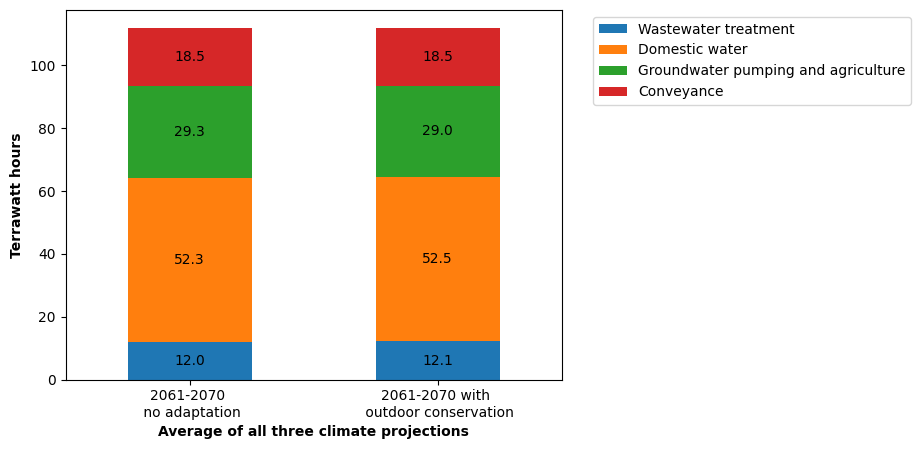

In [59]:
# average_values00 = dfCanESM2011_2020[['Wastewater treatment', 'Domestic water', 'Groundwater pumping and agriculture', 'Conveyance']].mean()
average_values01 = dfCanESM2061_2070[['Wastewater treatment', 'Domestic water', 'Groundwater pumping and agriculture', 'Conveyance']].mean()
average_values02 = dfCanESM_out2061_2070[['Wastewater treatment', 'Domestic water', 'Groundwater pumping and agriculture', 'Conveyance']].mean()

# average_values10 = dfCESM1BGC2011_2020[['Wastewater treatment', 'Domestic water', 'Groundwater pumping and agriculture', 'Conveyance']].mean()
average_values11 = dfCESM1BGC2061_2070[['Wastewater treatment', 'Domestic water', 'Groundwater pumping and agriculture', 'Conveyance']].mean()
average_values12 = dfCESM1BGC_out2061_2070[['Wastewater treatment', 'Domestic water', 'Groundwater pumping and agriculture', 'Conveyance']].mean()

# average_values20 = dfCMCCCM2011_2020[['Wastewater treatment', 'Domestic water', 'Groundwater pumping and agriculture', 'Conveyance']].mean()
average_values21 = dfCMCCCM2061_2070[['Wastewater treatment', 'Domestic water', 'Groundwater pumping and agriculture', 'Conveyance']].mean()
average_values22 = dfCMCCCM_out2061_2070[['Wastewater treatment', 'Domestic water', 'Groundwater pumping and agriculture', 'Conveyance']].mean()


# df_avg_values0 = pd.DataFrame([average_values00, average_values10, average_values20])
# df_avg_values0
average_values0 = df_avg_values0.mean(axis=0)
average_values0

df_avg_values1 = pd.DataFrame([average_values01, average_values11, average_values21])
average_values1 = df_avg_values1.mean(axis=0)

df_avg_values2 = pd.DataFrame([average_values02, average_values12, average_values22])
average_values2 = df_avg_values2.mean(axis=0)

#turns the average values into a dataframe and transposes them so they can be graphed properly
# average_values0 = average_values0.to_frame()
average_values1 = average_values1.to_frame()
average_values2 = average_values2.to_frame()
# average_values0 = average_values0.transpose()
average_values1 = average_values1.transpose()
average_values2 = average_values2.transpose()

average_values = pd.concat([#average_values0,
                            average_values1, average_values2]) /1000

average_values['scenario'] = [#'2011-2020 \n no adaptation', 
                              '2061-2070 \n no adaptation', '2061-2070 with \n outdoor conservation']
average_values.set_index('scenario', inplace=True)

# Create a stacked bar chart
ax = average_values.plot(kind='bar', stacked=True)

# Add data labels
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}', (x + width/2, y + height/2), ha='center', va='center')

# Customize the plot (optional)
plt.xlabel('Average of all three climate projections', fontweight='bold')
plt.ylabel('Terrawatt hours', fontweight='bold')
# plt.title('Average annual energy use by sector in hot and wet scenario', fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()

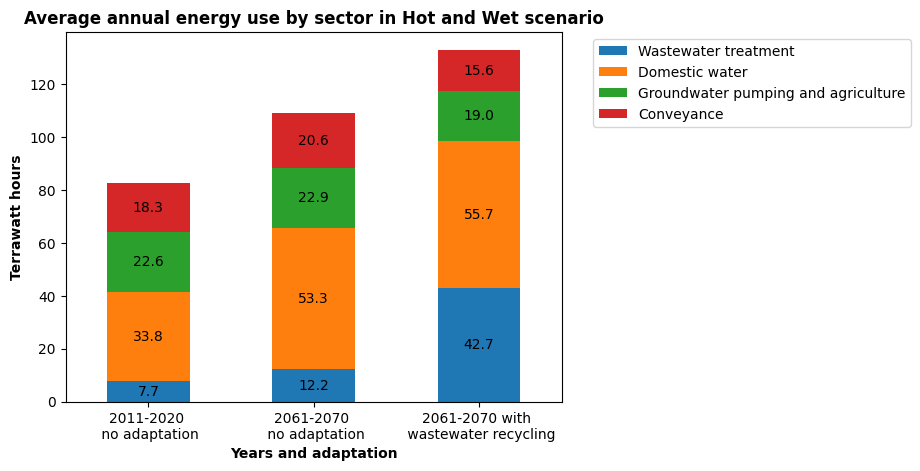

In [38]:
average_values0 = dfCanESM2011_2020[['Wastewater treatment', 'Domestic water', 'Groundwater pumping and agriculture', 'Conveyance']].mean()
average_values1 = dfCanESM2061_2070[['Wastewater treatment', 'Domestic water', 'Groundwater pumping and agriculture', 'Conveyance']].mean()
average_values2 = dfCanESM_ww2061_2070[['Wastewater treatment', 'Domestic water', 'Groundwater pumping and agriculture', 'Conveyance']].mean()

#turns the average values into a dataframe and transposes them so they can be graphed properly
average_values0 = average_values0.to_frame()
average_values1 = average_values1.to_frame()
average_values2 = average_values2.to_frame()
average_values0 = average_values0.transpose()
average_values1 = average_values1.transpose()
average_values2 = average_values2.transpose()

average_values = pd.concat([average_values0, average_values1, average_values2]) /1000

average_values['scenario'] = ['2011-2020 \n no adaptation', '2061-2070 \n no adaptation', '2061-2070 with \n wastewater recycling']
average_values.set_index('scenario', inplace=True)

# Create a stacked bar chart
ax = average_values.plot(kind='bar', stacked=True)

# Add data labels
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}', (x + width/2, y + height/2), ha='center', va='center')

# Customize the plot (optional)
plt.xlabel('Years and adaptation', fontweight='bold')
plt.ylabel('Terrawatt hours', fontweight='bold')
plt.title('Average annual energy use by sector in Hot and Wet scenario', fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()

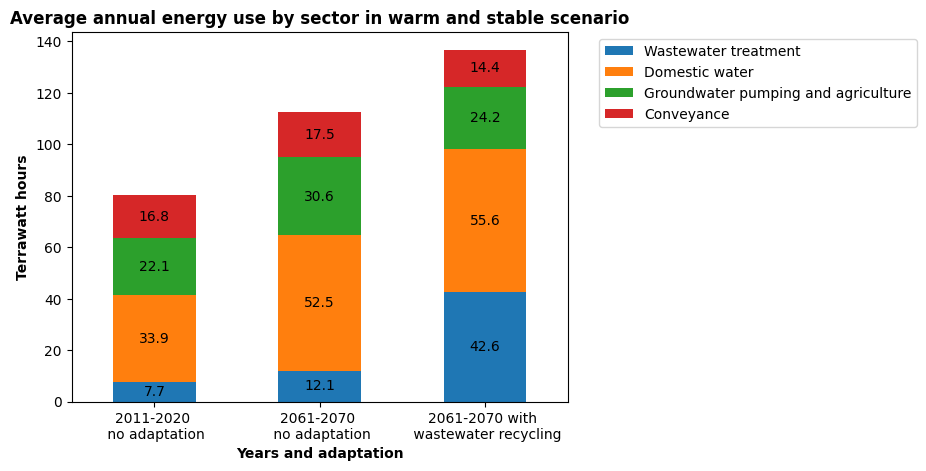

In [34]:
average_values0 = dfCESM1BGC2011_2020[['Wastewater treatment', 'Domestic water', 'Groundwater pumping and agriculture', 'Conveyance']].mean()
average_values = dfCESM1BGC2061_2070[['Wastewater treatment', 'Domestic water', 'Groundwater pumping and agriculture', 'Conveyance']].mean()
average_values2 = dfCESM1BGC_ww2061_2070[['Wastewater treatment', 'Domestic water', 'Groundwater pumping and agriculture', 'Conveyance']].mean()

#turns the average values into a dataframe and transposes them so they can be graphed properly
average_values0 = average_values0.to_frame()
average_values = average_values.to_frame()
average_values2 = average_values2.to_frame()
average_values0 = average_values0.transpose()
average_values = average_values.transpose()
average_values2 = average_values2.transpose()

average_values = pd.concat([average_values0, average_values, average_values2]) / 1000

labels = ['2011-2020 \n no adaptation', '2061-2070 \n no adaptation', '2061-2070 with \n wastewater recycling']
average_values['scenario'] = labels
average_values.set_index('scenario', inplace=True)

# Create a stacked bar chart
ax = average_values.plot(kind='bar', stacked=True)

# Add data labels
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}', (x + width/2, y + height/2), ha='center', va='center')

# # Wrap long labels
# wrapped_labels = []
# for label in labels:
#     wrapped_labels.append('\n'.join(textwrap.wrap(label, width=10)))  # Adjust width as needed


# Customize the plot (optional)
plt.xlabel('Years and adaptation', fontweight='bold')
plt.ylabel('Terrawatt hours', fontweight='bold')
plt.title('Average annual energy use by sector in Warm and Stable scenario', fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()


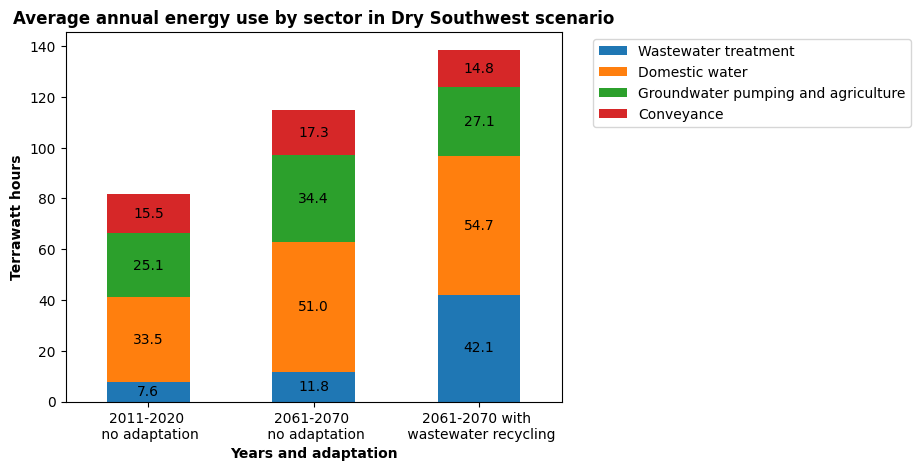

In [44]:
average_values0 = dfCMCCCM2011_2020[['Wastewater treatment', 'Domestic water', 'Groundwater pumping and agriculture', 'Conveyance']].mean()
average_values = dfCMCCCM2061_2070[['Wastewater treatment', 'Domestic water', 'Groundwater pumping and agriculture', 'Conveyance']].mean()
average_values2 = dfCMCCCM_ww2061_2070[['Wastewater treatment', 'Domestic water', 'Groundwater pumping and agriculture', 'Conveyance']].mean()

#turns the average values into a dataframe and transposes them so they can be graphed properly
average_values0 = average_values0.to_frame()
average_values = average_values.to_frame()
average_values2 = average_values2.to_frame()
average_values0 = average_values0.transpose()
average_values = average_values.transpose()
average_values2 = average_values2.transpose()

average_values = pd.concat([average_values0, average_values, average_values2]) / 1000

average_values['scenario'] = ['2011-2020 \n no adaptation', '2061-2070 \n no adaptation', '2061-2070 with \n wastewater recycling']
average_values.set_index('scenario', inplace=True)

# Create a stacked bar chart
ax = average_values.plot(kind='bar', stacked=True)

# Add data labels
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}', (x + width/2, y + height/2), ha='center', va='center')

# Customize the plot (optional)
plt.xlabel('Years and adaptation', fontweight='bold')
plt.ylabel('Terrawatt hours', fontweight='bold')
plt.title('Average annual energy use by sector in Dry Southwest scenario', fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()

In [49]:
def graph_energy_use_area (df_list, columns_to_plot, name_list):

    fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 25))
    
    for i, (df, name) in enumerate(zip(df_list, name_list)):
        df_selected = df[columns_to_plot]
        
        columns_to_divide = df_selected.columns.difference(['Year'])
        
        # Divide the selected columns by 1000
        df_selected[columns_to_divide] = df_selected[columns_to_divide] / 1000

        #this helps position the 6 plots in the relevant places to each other
        if i <=1:
            j = 0
        elif i<=3:
            j = 1
        else:
            j=2

        if i % 2 !=0:
            k = 1
        else:
            k = 0
        
        axs[j,k].stackplot(df_selected['Year'], df_selected['Domestic water'], df_selected['Groundwater pumping and agriculture'], 
                           df_selected['Conveyance'], df_selected['Wastewater'], labels=['Domestic water treatment', 'Groundwater pumping and agriculture',
                                                                                        'Conveyance', 'Wastewater recycling'])

        # df_selected['Domestic water'].plot(kind='area', x='Year', figsize=(15, 6), ax=axs[j, k], linestyle=':', legend=False)
        # df_selected['Wastewater'].plot(kind='area', x='Year', figsize=(15, 6), ax=axs[j, k], legend=False, linewidth=2)
        # df_selected['Groundwater pumping and agriculture'].plot(kind='area', x='Year', figsize=(15, 6), linestyle=':', ax=axs[j, k], legend=False)
        # df_selected['Conveyance'].plot(kind='area', x='Year', figsize=(15, 6), linestyle=':', ax=axs[j, k], legend=False)
        # df_selected['Other'].plot(kind='area', x='Year', figsize=(15, 6), linestyle=':', ax=axs[j, k], legend=False)
    
        
        # axs[j, k].legend(fontsize=8)
        axs[j, k].set_title(name)
        axs[j, k].set_ylim(0, 160)
        axs[j, k].set_xlabel('Year')
        axs[j, k].set_ylabel('Gigawatt Hours')
    plt.legend(title = 'Energy use from source', loc='lower center', bbox_to_anchor=(0,-1.5), ncol=2, fancybox=True)
    plt.subplots_adjust(hspace=1)
    plt.tight_layout()
    plt.show()

C:\Users\Sunny\AppData\Local\Temp\ipykernel_20624\3646905694.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[columns_to_divide] = df_selected[columns_to_divide] / 1000
C:\Users\Sunny\AppData\Local\Temp\ipykernel_20624\3646905694.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[columns_to_divide] = df_selected[columns_to_divide] / 1000
C:\Users\Sunny\AppData\Local\Temp\ipykernel_20624\3646905694.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

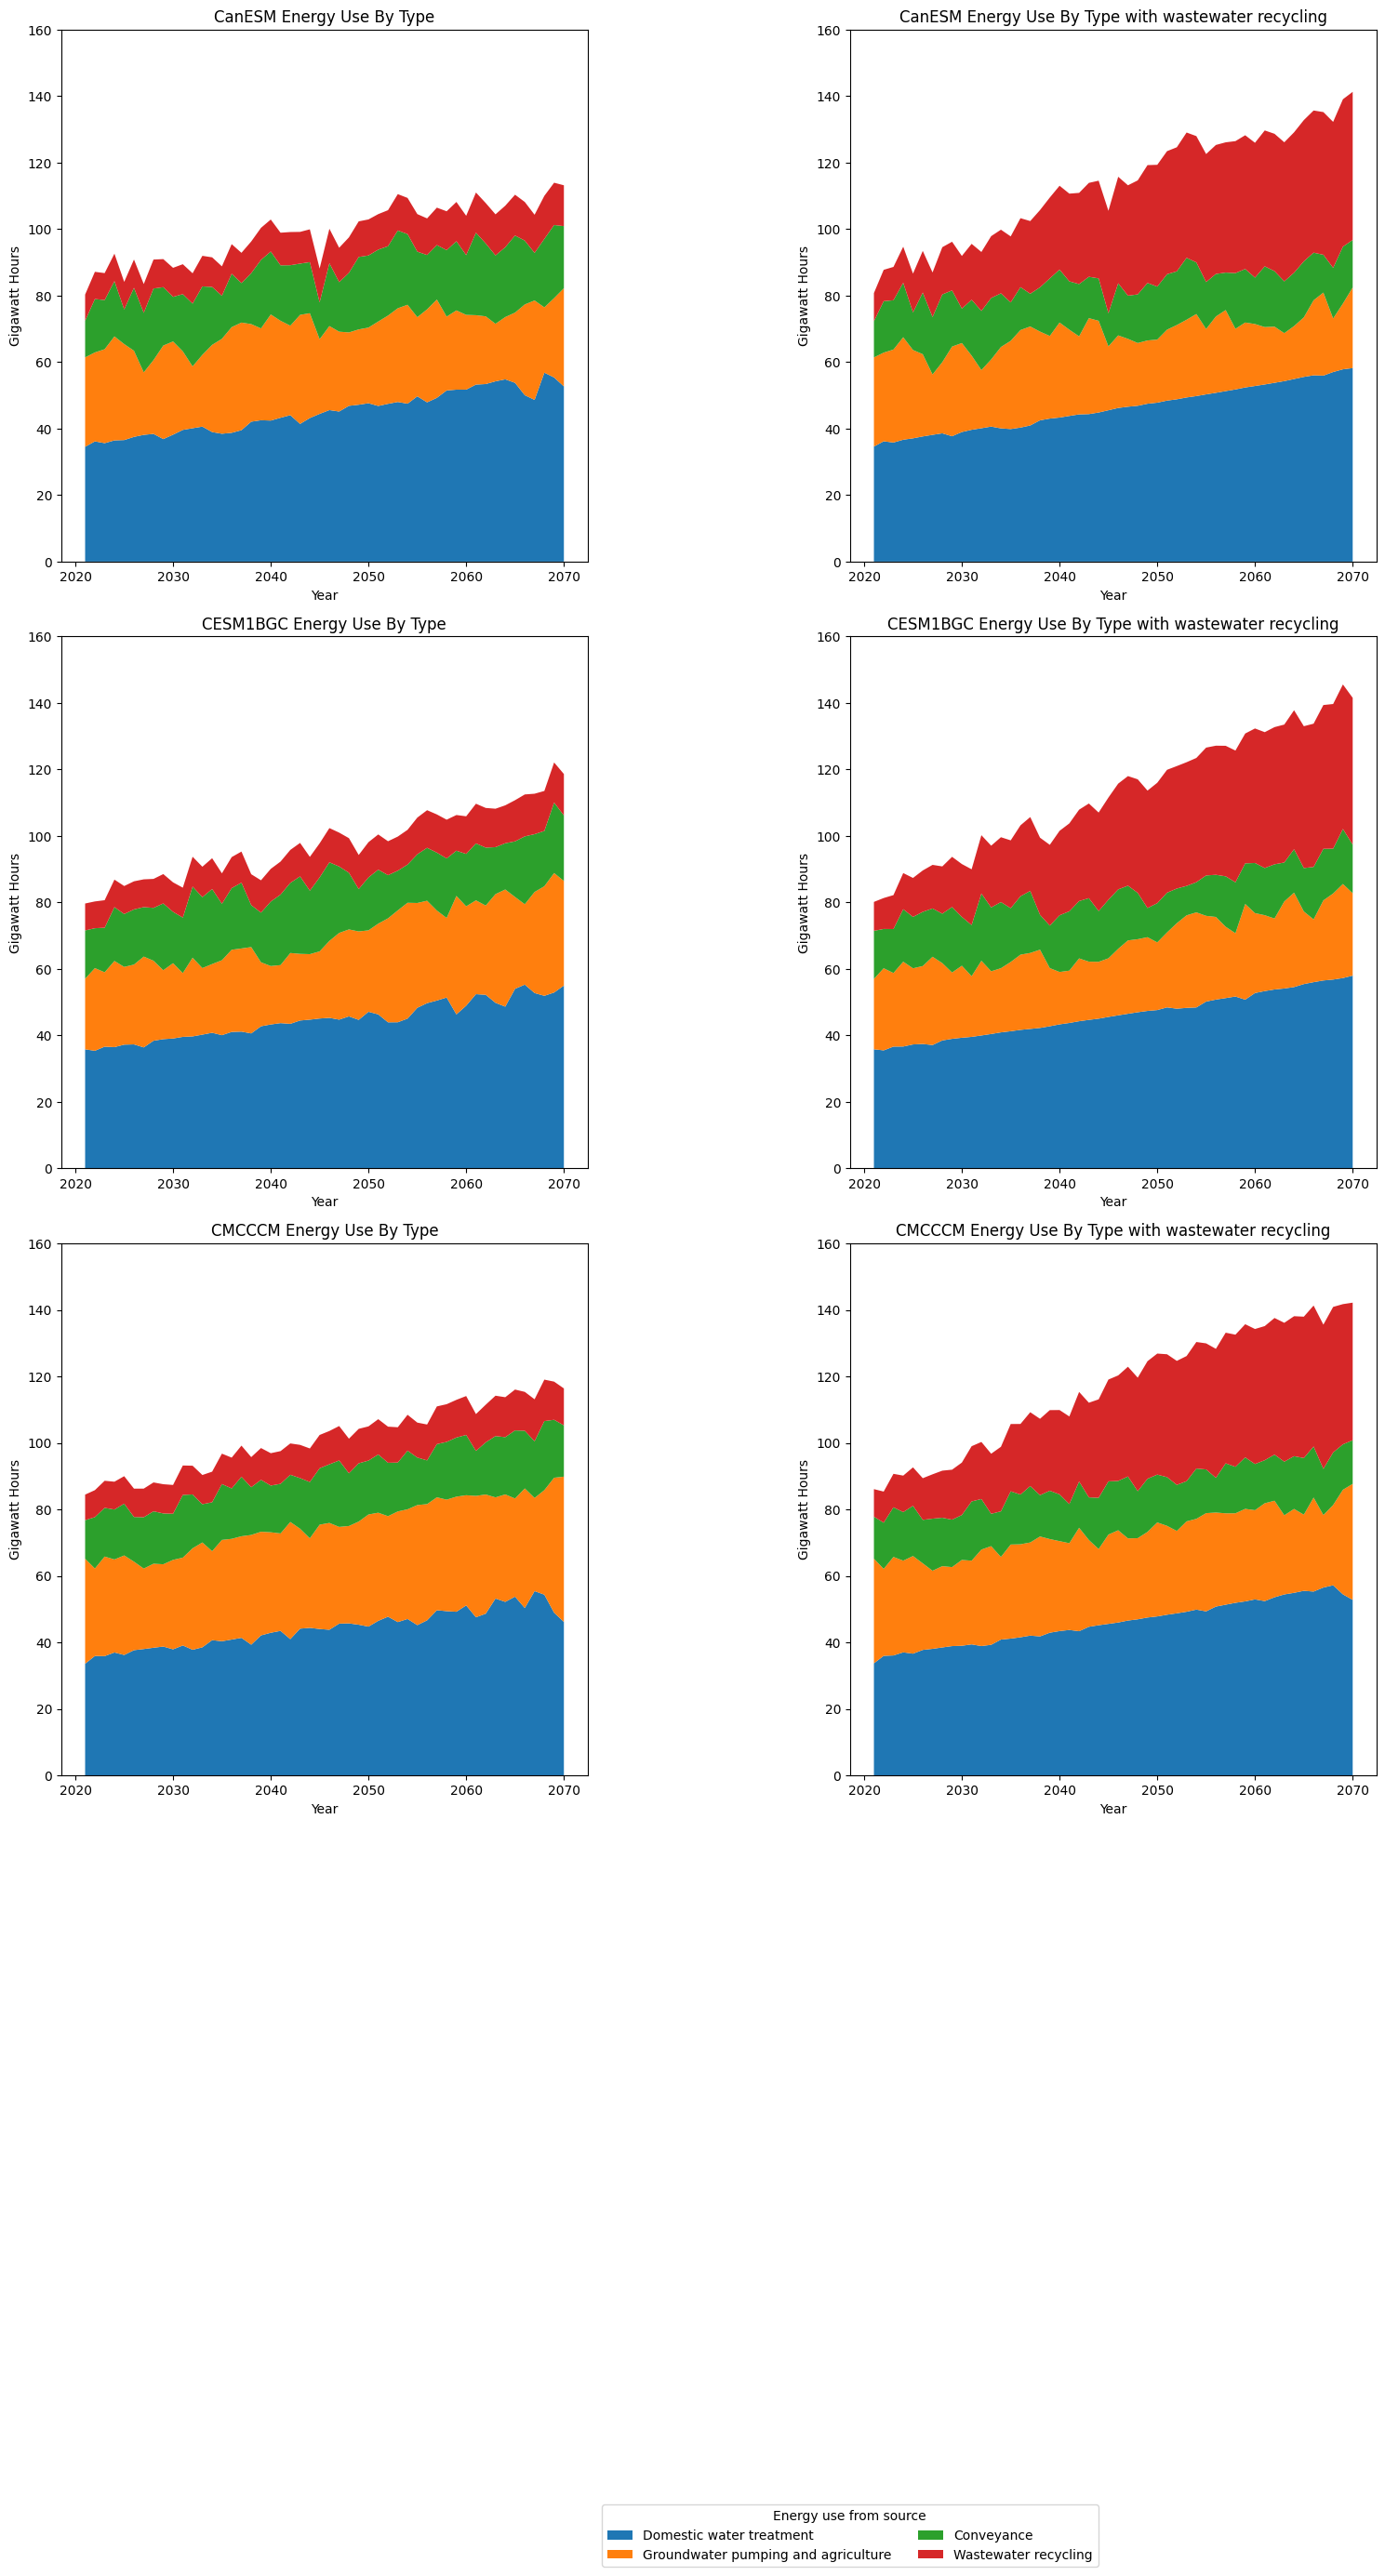

In [50]:
graph_energy_use_area(year_dfs, total_energy_columns, year_df_names)

C:\Users\Sunny\AppData\Local\Temp\ipykernel_15504\1671387359.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[columns_to_divide] = df_selected[columns_to_divide] / 1000


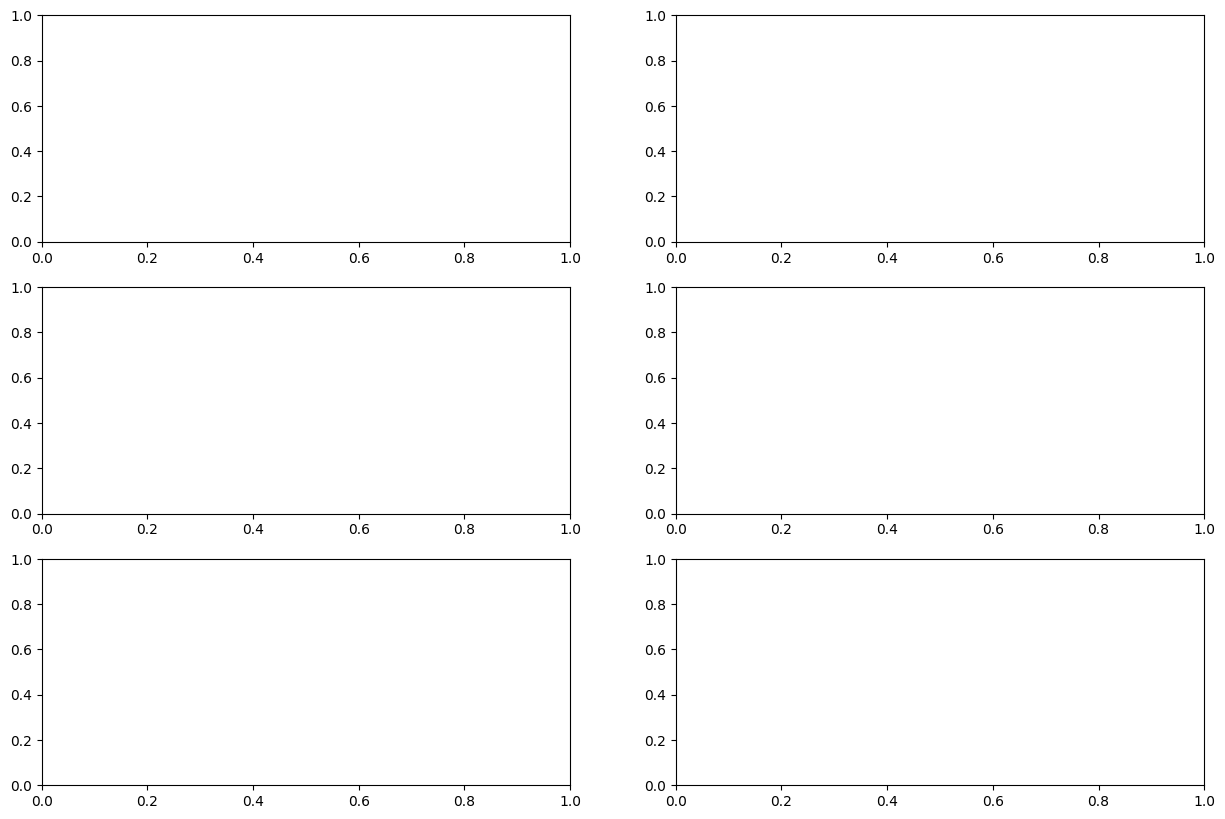

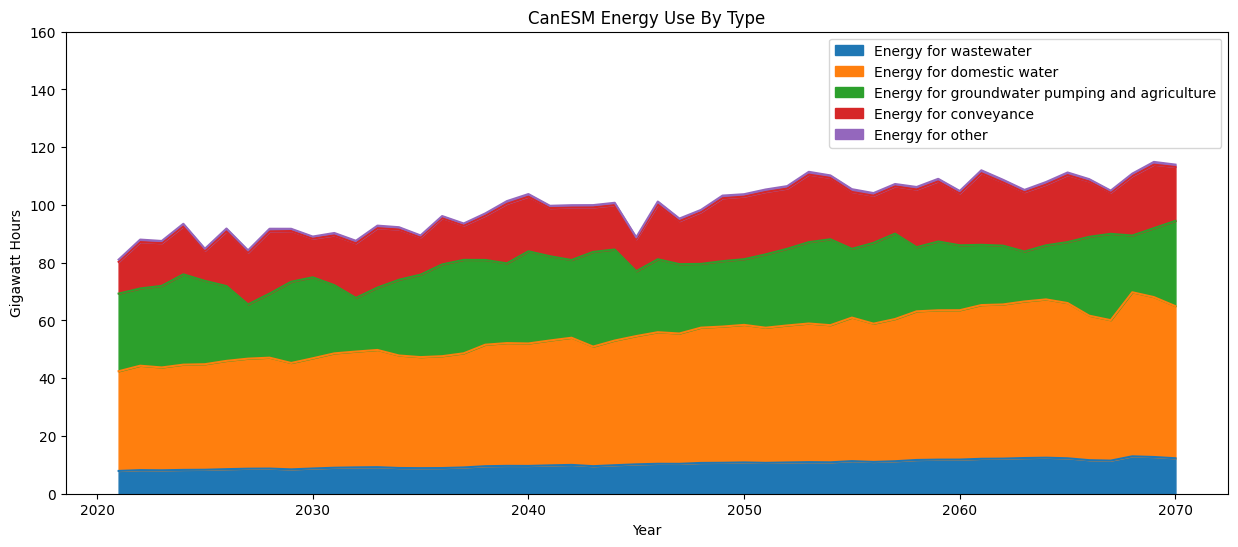

C:\Users\Sunny\AppData\Local\Temp\ipykernel_15504\1671387359.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[columns_to_divide] = df_selected[columns_to_divide] / 1000


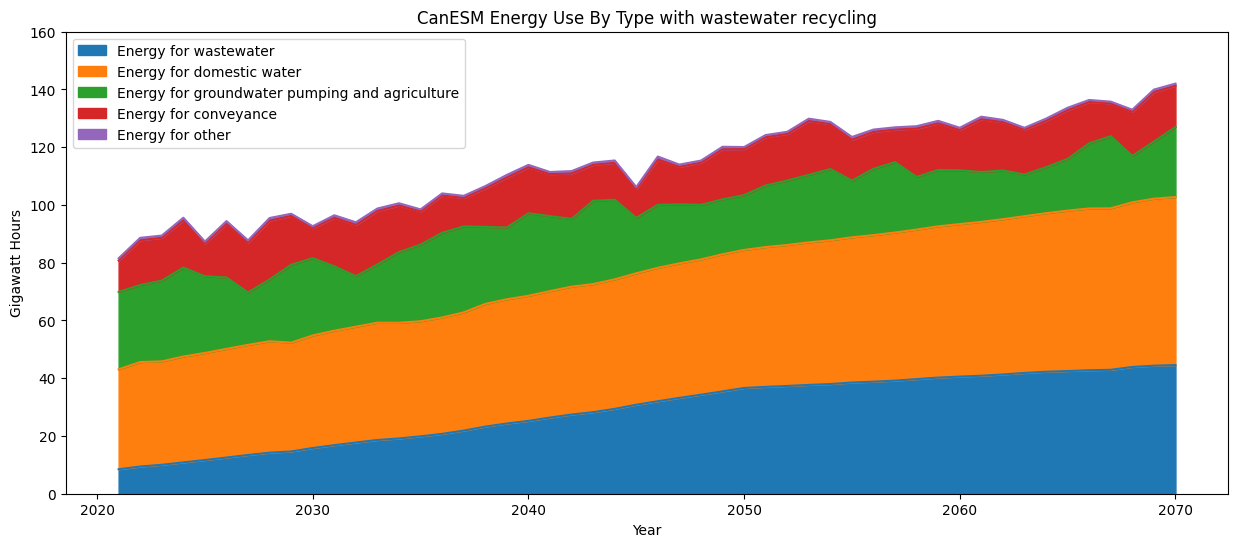

C:\Users\Sunny\AppData\Local\Temp\ipykernel_15504\1671387359.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[columns_to_divide] = df_selected[columns_to_divide] / 1000


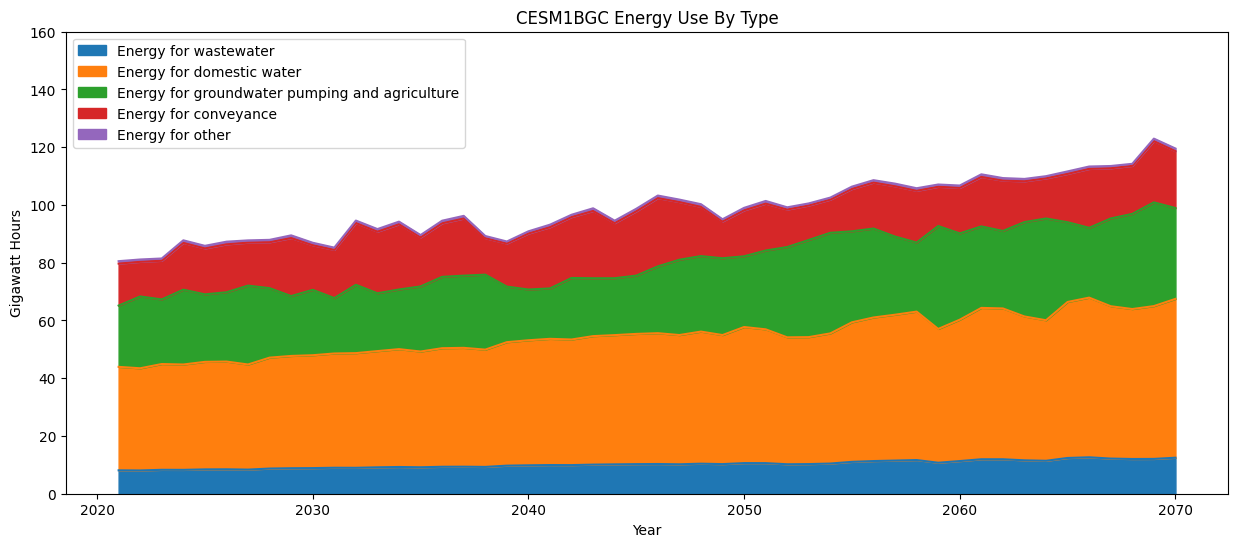

C:\Users\Sunny\AppData\Local\Temp\ipykernel_15504\1671387359.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[columns_to_divide] = df_selected[columns_to_divide] / 1000


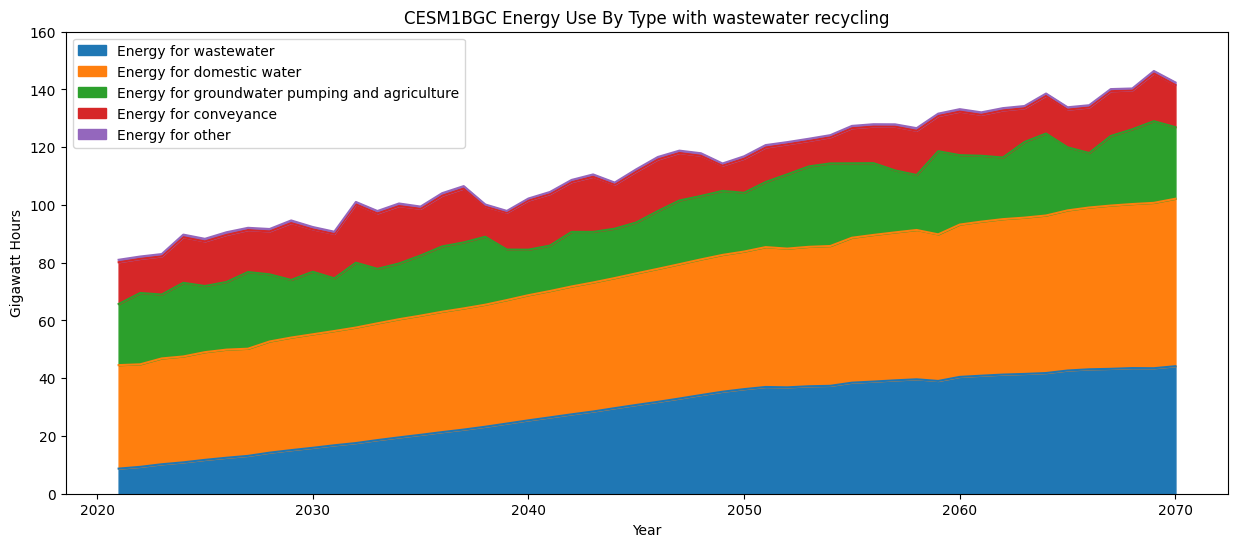

C:\Users\Sunny\AppData\Local\Temp\ipykernel_15504\1671387359.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[columns_to_divide] = df_selected[columns_to_divide] / 1000


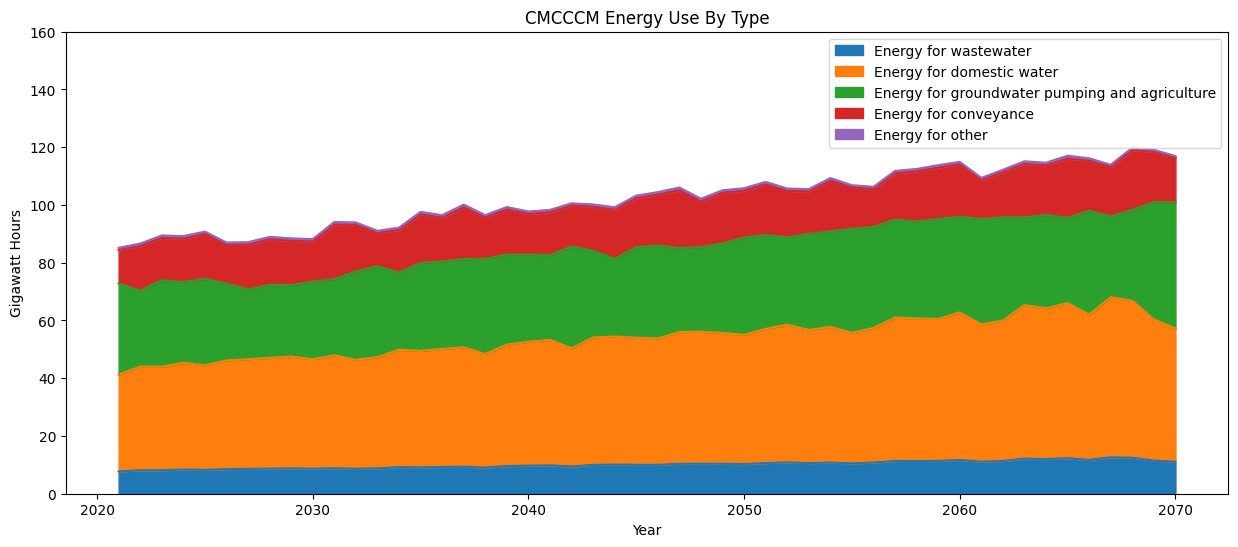

C:\Users\Sunny\AppData\Local\Temp\ipykernel_15504\1671387359.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[columns_to_divide] = df_selected[columns_to_divide] / 1000


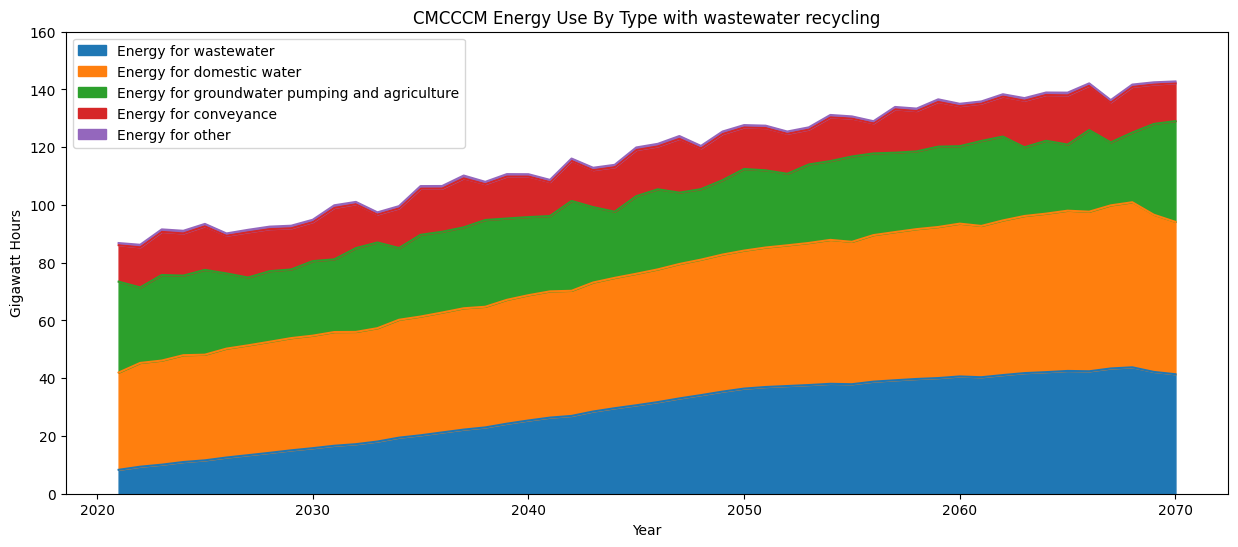

In [32]:
total_energy_columns = ['Energy for wastewater', 'Energy for domestic water', 'Energy for groundwater pumping and agriculture', 'Energy for conveyance', 'Energy for other', 'Year']

year_df_names = ['CanESM Energy Use By Type', 'CanESM Energy Use By Type with wastewater recycling', 
                 'CESM1BGC Energy Use By Type', 'CESM1BGC Energy Use By Type with wastewater recycling',
                 'CMCCCM Energy Use By Type', 'CMCCCM Energy Use By Type with wastewater recycling']

legend_values = ['Agriculture', 'Groundwater pumping and agriculture', 'Other', 'Nonpotable reuse and distribution', 'Municipal treatment and distribution', 
                 'Groundwater pumping', 'Water heating', 'Conveyance', 'Wastewater Treatment', 'Wastewater Recycling']

#Merges --> Wastewater: WW Treatment, WW Recycling, and Nonpotable resue and distribution
#Merges --> Domestic: Municipal treatment & distribution, Water heating
#Merges --> Groundwater & Ag: Groundwater pumping, Agriculture, Groundwater pumping & Agriculture
#Merges --> Conveyance: Conveyance
#Merges --> Other: Other

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))

for df, name in zip(year_dfs, year_df_names):
    axs[0,0] = graph_energy_use(year_dfs, total_energy_columns, year_df_name)



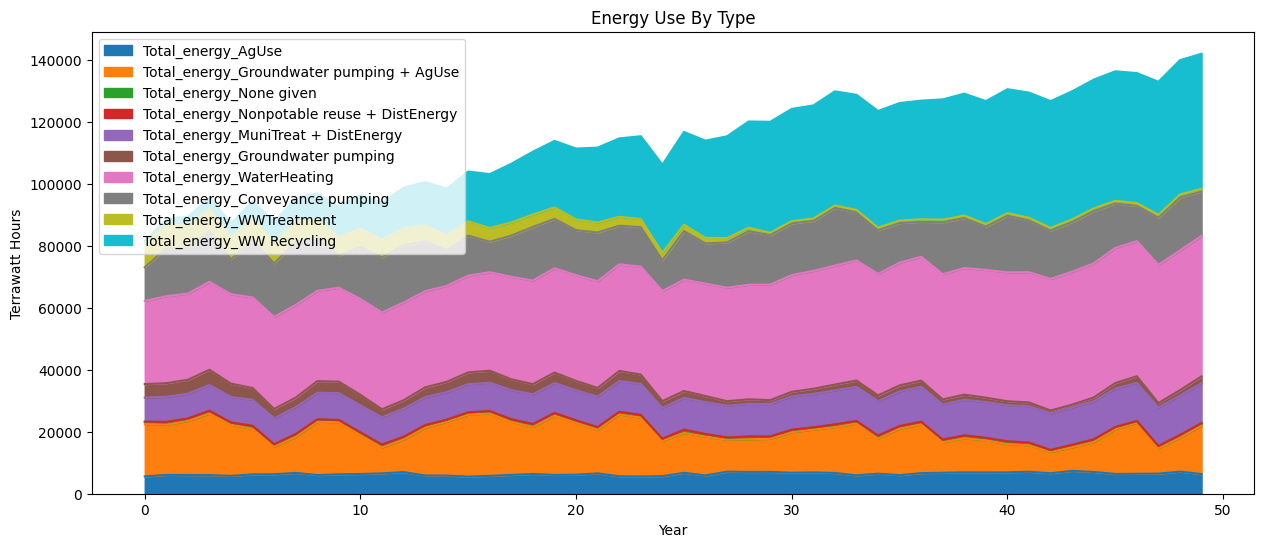

In [84]:
dfCanESM2020_ww_by_year[['Total_energy_AgUse', 'Total_energy_Groundwater pumping + AgUse', 'Total_energy_None given', 'Total_energy_Nonpotable reuse + DistEnergy',
                      'Total_energy_MuniTreat + DistEnergy', 'Total_energy_Groundwater pumping', 'Total_energy_WaterHeating', 'Total_energy_Conveyance pumping',
                      'Total_energy_WWTreatment', 'Total_energy_WW Recycling']].plot(kind='area', stacked=True, figsize=(15,6))  

plt.title('Energy Use By Type')
plt.xlabel('Year')
plt.ylabel('Terrawatt Hours')
plt.show()